In [2]:
import numpy as np
import gym
from gym import wrappers
from gym.envs.toy_text.frozen_lake import generate_random_map
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime



In [4]:
def run_episode(env, policy, gamma = 1.0, render = False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.
    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.
    returns:
    total reward: real value of the total reward recieved by agent under policy.
    """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward


In [5]:
def evaluate_policy(env, policy, gamma = 1.0,  n = 2000):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return scores

def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                # next_sr is a tuple of (probability, next state, reward, done)
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy


In [6]:
def value_iteration(env, gamma):
    """ Value-iteration algorithm """
    v = np.zeros(env.observation_space.n)  # initialize value-function
    max_iterations = 10000
    eps = 1e-20
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.observation_space.n):
            q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.env.action_space.n)]
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            break
    return v


gamma = 1e-06


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Value-iteration converged at iteration# 1373.


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Policy average score = 6.666706666759999e-34
gamma = 1e-05
Value-iteration converged at iteration# 1373.
Policy average score = 3.0000533341333468e-28
gamma = 0.0001
Value-iteration converged at iteration# 1373.
Policy average score = 2.0004334300100012e-23
gamma = 0.001
Value-iteration converged at iteration# 1373.
Policy average score = 3.67134067534035e-18
gamma = 0.01
Value-iteration converged at iteration# 1373.
Policy average score = 1.3840064646475155e-13
gamma = 0.1
Value-iteration converged at iteration# 1373.
Policy average score = 3.9269062423005705e-08
gamma = 0.2
Value-iteration converged at iteration# 1373.
Policy average score = 9.016154111698586e-07
gamma = 0.4
Value-iteration converged at iteration# 1373.
Policy average score = 6.308225865982608e-05
gamma = 0.8
Value-iteration converged at iteration# 1373.
Policy average score = 0.014873407364086001
gamma = 1.0
Value-iteration converged at iteration# 1373.
Policy average score = 0.738


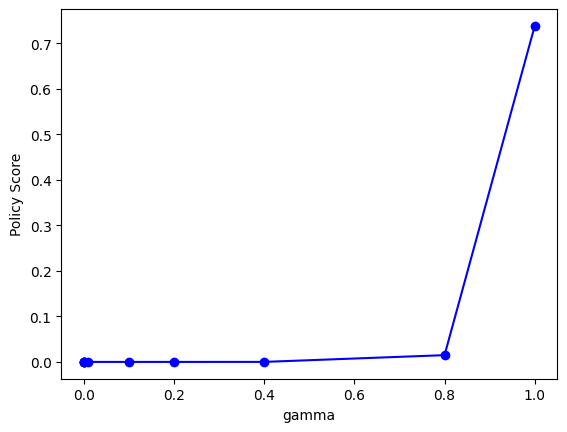

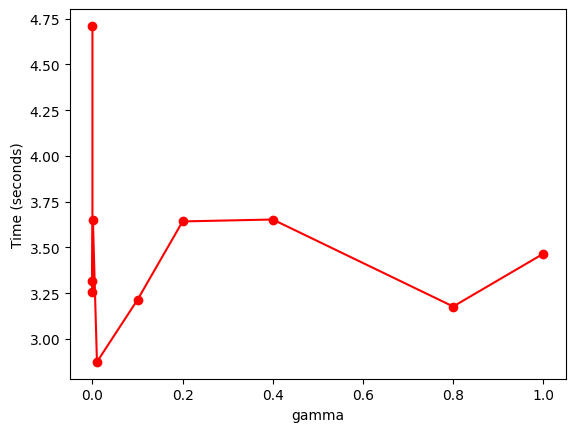

In [8]:
import gym
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Define or import the necessary functions: value_iteration, extract_policy, evaluate_policy

# 4x4 grid
gamma_values = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.8, 1.0]
policy_average_score = []
time_iteration = []

for gamma in gamma_values:
    print("gamma =", gamma)
    env_name = 'FrozenLake-v1'
    env = gym.make(env_name)
    num_states = env.observation_space.n  # Get the number of states from the observation space
    start = datetime.now()

    # Run value iteration and extract optimal policy
    optimal_v = value_iteration(env, gamma)  # Assuming value_iteration doesn't need num_states argument
    policy = extract_policy(optimal_v, gamma)  # Assuming extract_policy doesn't need num_states argument

    # Evaluate policy
    policy_scores = evaluate_policy(env, policy, gamma, n=3000)
    policy_average_score.append(np.mean(policy_scores))

    end = datetime.now()
    time_iteration.append((end - start).total_seconds())

    print('Policy average score =', np.mean(policy_scores))

# Plot policy average score vs. gamma
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='gamma', ylabel='Policy Score')
ax.plot(gamma_values, policy_average_score, 'o-', color='b')
plt.show()

# Plot time vs. gamma
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='gamma', ylabel='Time (seconds)')
ax.plot(gamma_values, time_iteration, 'o-', color='r')
plt.show()



/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


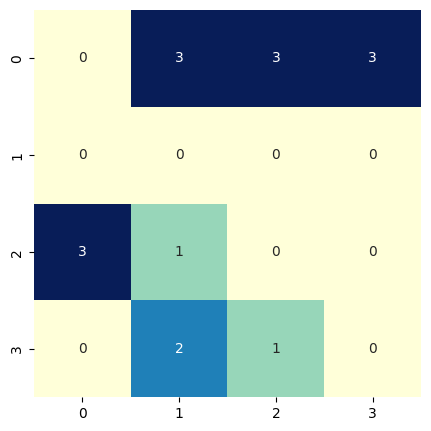

In [17]:
#heatmap plot

policy = policy.reshape(4, 4)
plt.figure(figsize=(5, 16))
sns.heatmap(policy,  cmap="YlGnBu", annot=True, cbar=False, square=True)
def display_value_iteration(P, env = gym.make('FrozenLake-v1')):
    nb_states = env.observation_space.n
    visited_states = np.zeros(nb_states).astype(bool)
    visited_states[0] = 1
    states_labels = np.where(P==0, '<',
                              np.where(P==1, '>',
                                       np.where(P==2, 'v',
                                                np.where(P==3, '^', P)
                                               )
                                      )
                             )
    desc = env.unwrapped.desc.ravel().astype(str)
    colors = np.where(desc=='S','y',np.where(desc=='F','b',np.where(desc=='H','r',np.where(desc=='G','g',desc))))
    states_labels = np.zeros(nb_states).astype(str)
    states_labels[:] = ''
    total_reward = 0
    s = env.reset()
    #env.render()
    done = False
    while done != True:
        best_a = P[s] # select the best next action from the policy
        states_labels[s] = '^' if best_a==0 else ('v' if best_a==1 else ('>' if best_a==2 else '<'))
        #print(s, best_a)
        s, rew, done, info = env.step(best_a) #take step using selected action
        total_reward = total_reward + rew
        visited_states[s] = 1 # mark the state as visited
        #env.render()
    ax = sns.heatmap(P.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))),
                 linewidth=0.5,
                 annot=states_labels.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))),
                 cmap=list(colors),
                 fmt = '',
                 cbar=False)
    plt.show()
    print("Total Reward: ", total_reward)


In [8]:
pip install mdptoolbox-hiive

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.7 MB/s eta 0:00:00
  Created wheel for mdptoolbox-hiive: filename=mdptoolbox_hiive-4.0.3.1-py3-none-any.whl size=35121 sha256=5f26d33dfeec0211320e0ba0e48636db08fa2f062f2880cc64eec49ed3a50d33
  Stored in directory: /root/.cache/pip/wheels/3c/21/00/79fb3890bf11432b069070b7623416cd8b9f8501580692a52f
Successfully built mdptoolbox-hiive


In [9]:
from hiive.mdptoolbox import example, mdp
from tqdm import tqdm

# helper functions

TERM_STATE_MAP = {"4x4": [5, 7, 11, 12], "8x8": [19, 29, 35, 41, 42, 46, 49, 52, 54, 59], "50x50":[]}
GOAL_STATE_MAP = {"4x4": [15], "8x8": [63], "50x50":[2499]}
cmap = 'cool'
def visualize_env(env, name, title=None):
    shape = env.desc.shape
    M = shape[0]
    N = shape[1]
    arr = np.zeros(shape)
    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                arr[i, j] = 0.25
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                arr[i, j] = 1.0
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(arr, cmap=cmap)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2)

    for i in range(M):
        for j in range(N):
            if (i, j) == (0, 0):
                ax.text(j, i, 'S', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k', size=18)
            else:
                ax.text(j, i, 'F', ha='center', va='center', color='k', size=18)
    fig.tight_layout()
    if title:
        ax.set_title(title)
    plt.show()

In [10]:
def visualize_policy(policy, shape, name, title=None):
    M = shape[0]
    N = shape[1]
    actions = np.asarray(policy).reshape(shape)
    mapping = {
        0: '←',
        1: '↓',
        2: '→',
        3: '↑'
    }
    arr = np.zeros(shape)
    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                arr[i, j] = 0.25
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                arr[i, j] = 1.0
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(arr, cmap=cmap)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2)

    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k', size=18)
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k', size=18)
            else:
                ax.text(j, i, mapping[actions[i, j]], ha='center', va='center', color='k', size=18)
    # fig.tight_layout()
    if title:
        ax.set_title(title)
    plt.show()

In [11]:
def visualize_value(V, shape, name, title=None):
    V = np.asarray(V)
    M = shape[0]
    N = shape[1]
    fig, ax = plt.subplots(figsize=(12,12))
    arr = V.reshape(shape)
    im = ax.imshow(arr, cmap=cmap)
    ax.set_xticks(np.arange(M))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels(np.arange(M))
    ax.set_yticklabels(np.arange(N))
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(False)
    ax.grid(which='minor', color='w', linewidth=2)
    for i in range(M):
        for j in range(N):
            if (N * i + j) in TERM_STATE_MAP[name]:
                ax.text(j, i, 'H', ha='center', va='center', color='k')
            elif (N * i + j) in GOAL_STATE_MAP[name]:
                ax.text(j, i, 'G', ha='center', va='center', color='k')
            else:
                ax.text(j, i, '%.2f' % (arr[i, j]), ha='center', va='center', color='k')
    # fig.tight_layout()
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('State-value estimate', rotation=-90, va="bottom")
    if title:
        ax.set_title(title)
    plt.show()

In [13]:
# Unpacked from gym.unwrapped.P is a list of states. Each state has a dictionary [0,1,2,3]. Each dictionary
# contains a 4 part tuple [probability(?),new_state,reward,finished]
def getRewardProb(env, sz):
    sz = int(sz**2)
    r = np.zeros((4,sz,sz))
    p = np.zeros((4,sz,sz))
    envP = env.unwrapped.P
    for state in envP:
        for action in envP[state]:
            transitions = envP[state][action]
            for t_idx in range((len(transitions))):
                new_state = transitions[t_idx][1]
                trans_prob = transitions[t_idx][0]
                reward = transitions[t_idx][2]
                p[action][state][new_state] += trans_prob
                r[action][state][new_state] += reward
            p[action,state,:] /= np.sum(p[action,state,:])
    return r, p

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don

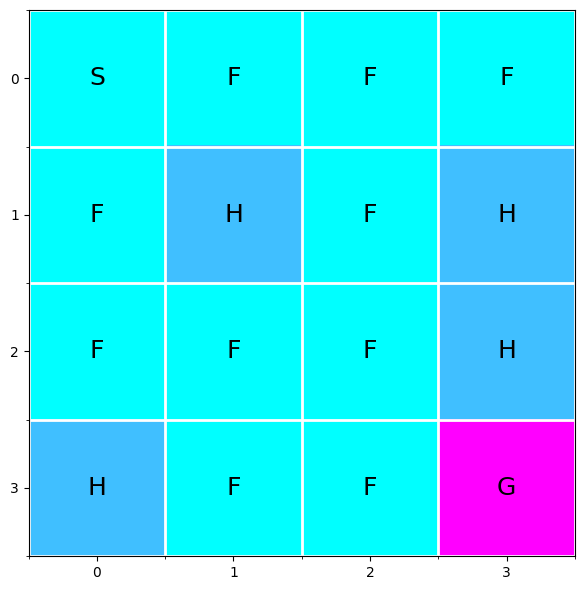

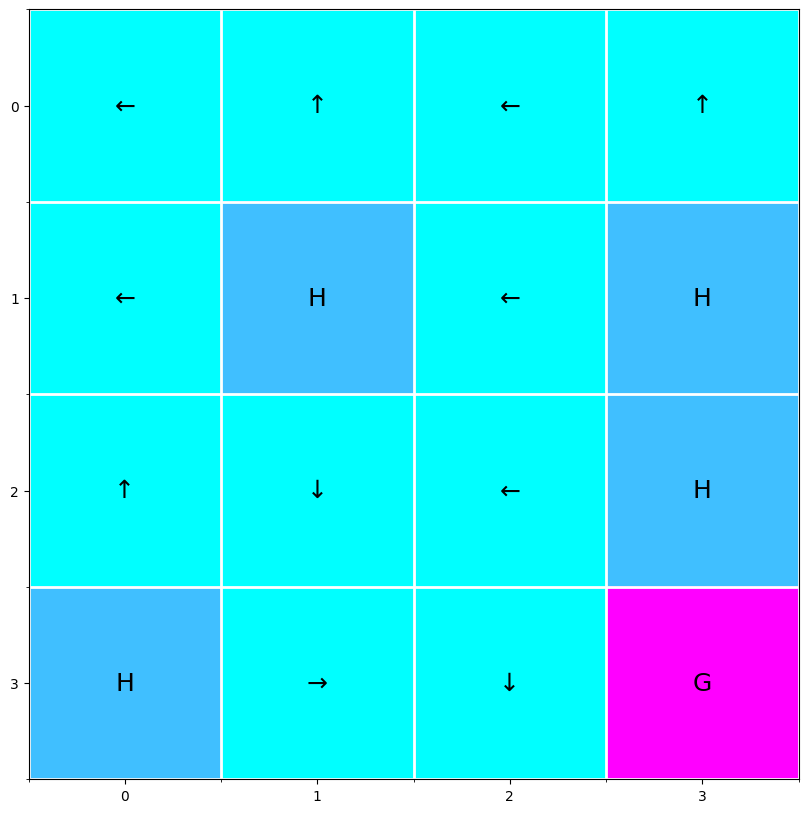

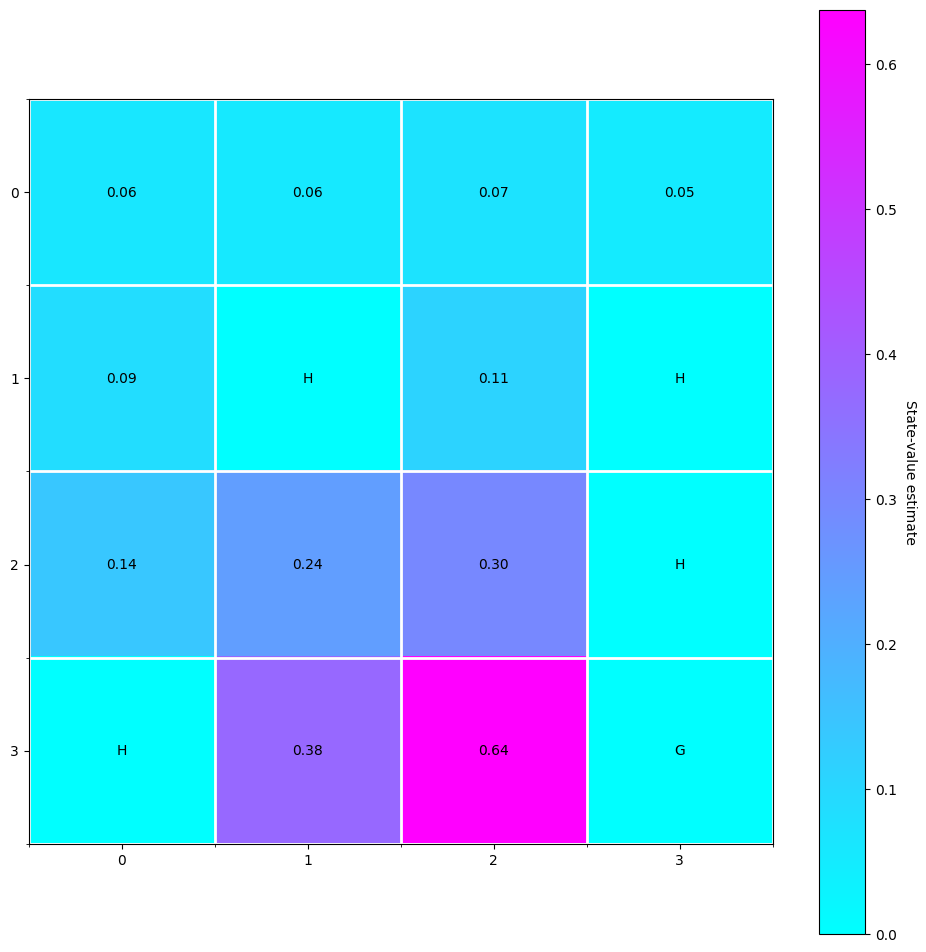

(0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)
(0.06162274283994246, 0.05531399137342944, 0.06996222441595021, 0.05101702913301784, 0.0851946143178323, 0.0, 0.10976851693787402, 0.0, 0.13996615432409334, 0.24373109529624212, 0.29696299492872447, 0.0, 0.0, 0.37715398384339976, 0.6375395830635081, 0.0)


In [8]:
s = 4
opt = "{}x{}".format(s,s)
sz = (s,s)
env = gym.make("FrozenLake-v1", map_name=opt)
env.reset()
env.render()
visualize_env(env, opt)
if s == 4:
    r, p = getRewardProb(env, 4)
else:
    r, p = getRewardProb(env, 8)
vi = mdp.ValueIteration(p, r, 0.9, max_iter=10000)
vi.run()
visualize_policy(vi.policy, sz, opt)
visualize_value(vi.V, sz, opt)
print(vi.policy)
print(vi.V)

In [13]:
#value iteration
def valueIterateGraph(p, r, value_iterate=True):
    max_vs = []
    mean_vs = []
    errors = []
    rewards = []
    iterations = []
    gammas = list(np.arange(0.5,1,0.1))
    print(gammas)
    for gamma in gammas:
        if value_iterate:
            vi = mdp.ValueIteration(p, r, gamma)
        else:
            vi = mdp.PolicyIteration(p, r, gamma, max_iter=50)
        vi.run()
        vi.run_stats
        iterations.append(list(range(1,len(vi.run_stats)+1)))
        max_vs.append([el['Max V'] for el in vi.run_stats])
        mean_vs.append([el['Mean V'] for el in vi.run_stats])
        errors.append([el['Error'] for el in vi.run_stats])
        rewards.append([el['Reward'] for el in vi.run_stats])

    f, ax = plt.subplots(2,2, figsize=(15,12))
    ax[0][0].set_title("Max V", fontsize=16)
    for i in range(len(max_vs)):
        ax[0][0].plot(iterations[i], max_vs[i], alpha=1, label="Gamma: {}".format(np.round(gammas[i],3)))
    ax[0][0].legend()
    ax[0][0].set_xlabel("# Iterations")

    ax[0][1].set_title("Mean V", fontsize=16)
    for i in range(len(mean_vs)):
        ax[0][1].plot(iterations[i], mean_vs[i], alpha=1, label="Gamma: {}".format(np.round(gammas[i],3)))
    ax[0][1].legend()
    ax[0][1].set_xlabel("# Iterations")

    ax[1][0].set_title("Error", fontsize=16)
    for i in range(len(errors)):
        ax[1][0].plot(iterations[i], errors[i], alpha=1, label="Gamma: {}".format(np.round(gammas[i],3)))
    ax[1][0].legend()
    ax[1][0].set_xlabel("# Iterations")

    ax[1][1].set_title("Reward", fontsize=16)
    for i in range(len(max_vs)):
        ax[1][1].plot(iterations[i], rewards[i], alpha=1, label="Gamma: {}".format(np.round(gammas[i],3)))
    ax[1][1].legend()
    ax[1][1].set_xlabel("# Iterations")
    plt.plot()

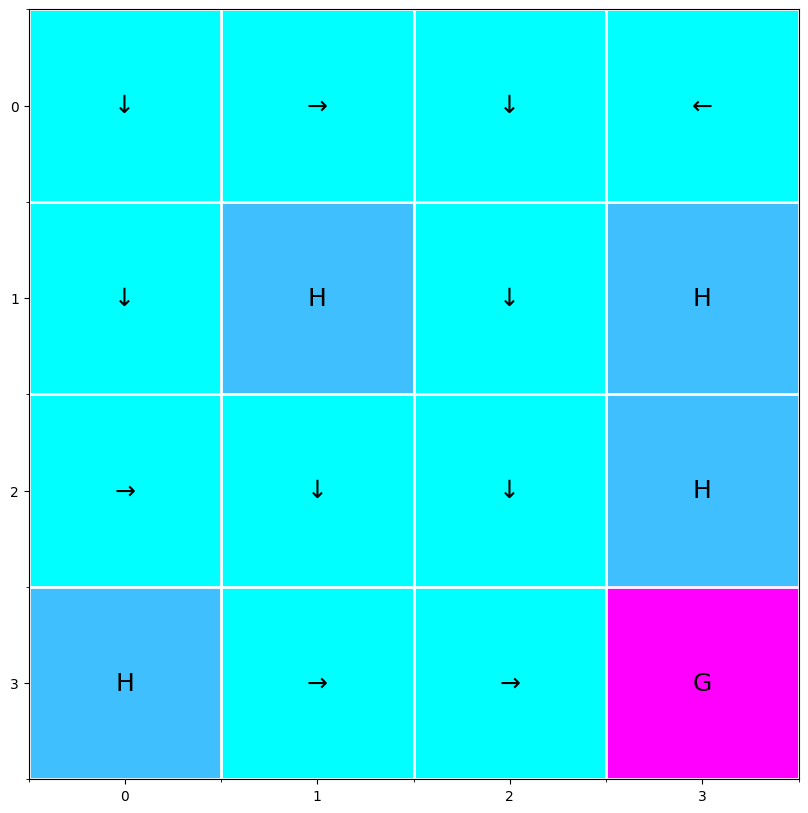

[0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999]
0.6411185264587402


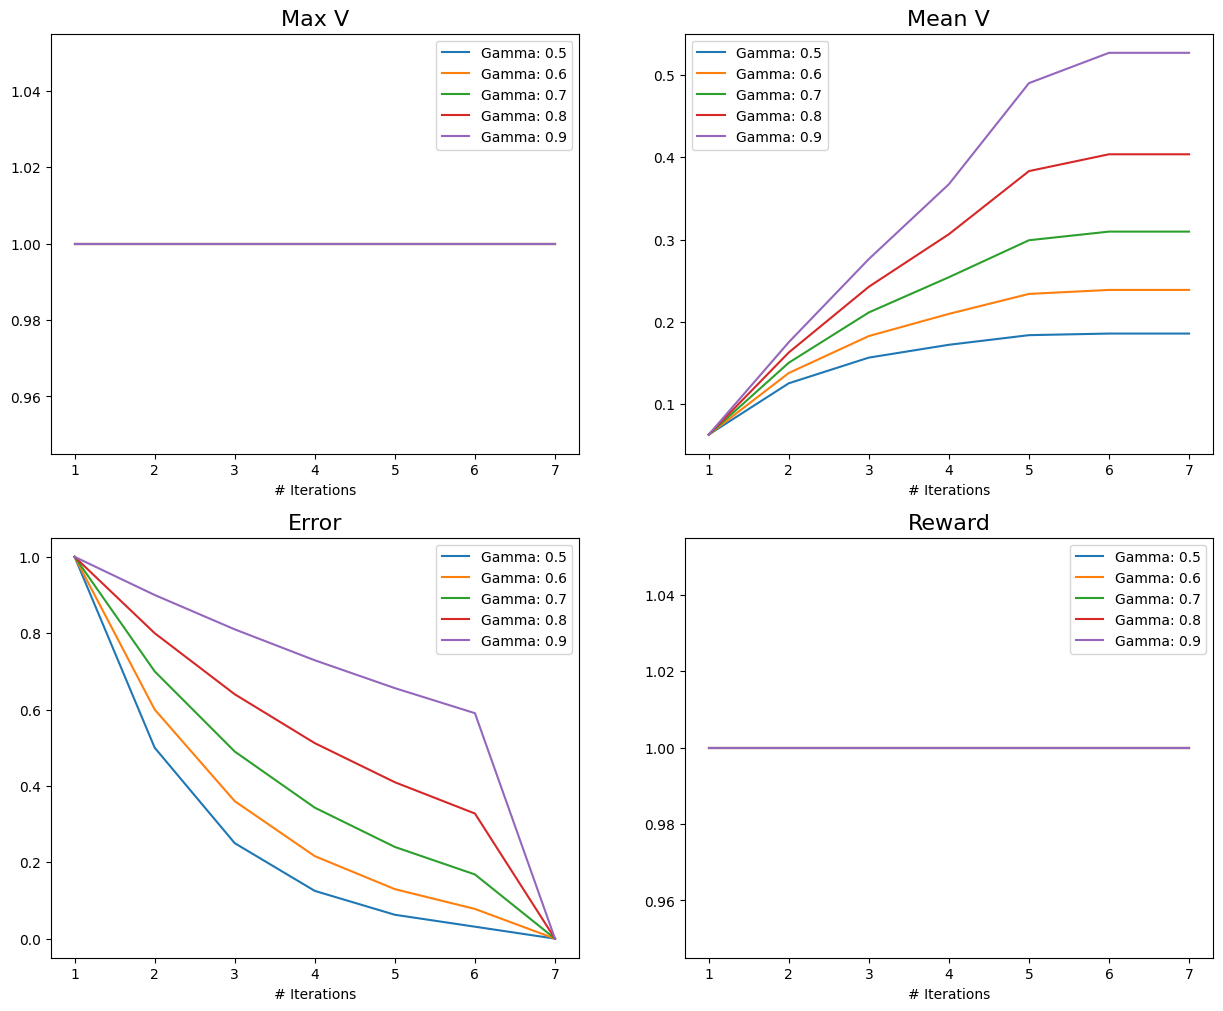

In [59]:
from time import time
tic = time()
env = gym.make("FrozenLake-v1", is_slippery=False)
r, p = getRewardProb(env,4)
vi = mdp.ValueIteration(p, r, 0.9, max_iter=10000)
vi.run()
visualize_policy(vi.policy, (4,4), "4x4")
valueIterateGraph(p, r)
print(time()-tic)

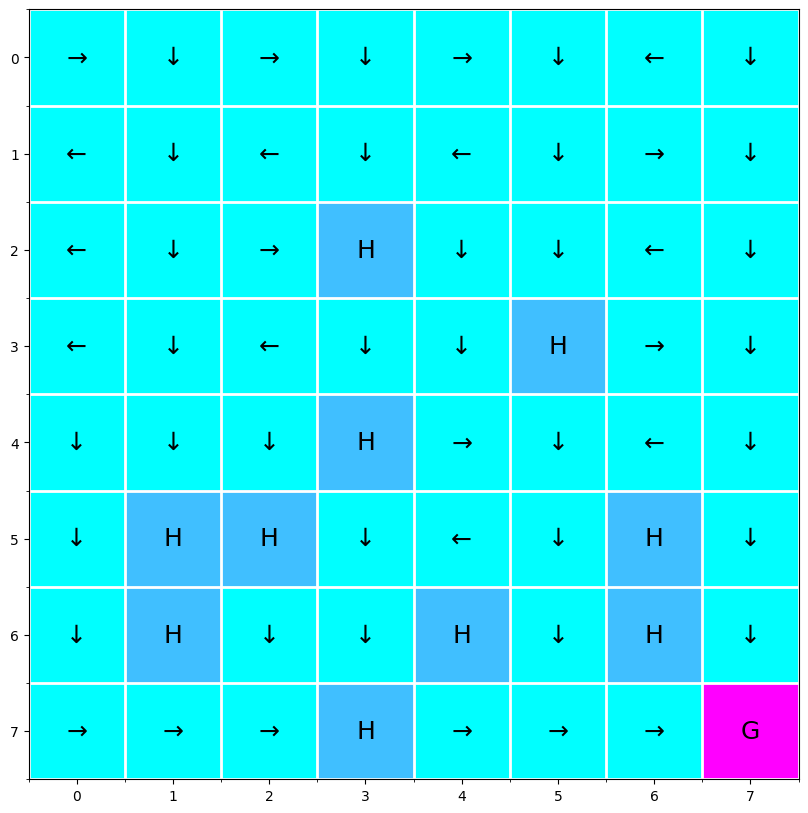

[0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999]
0.5784788131713867


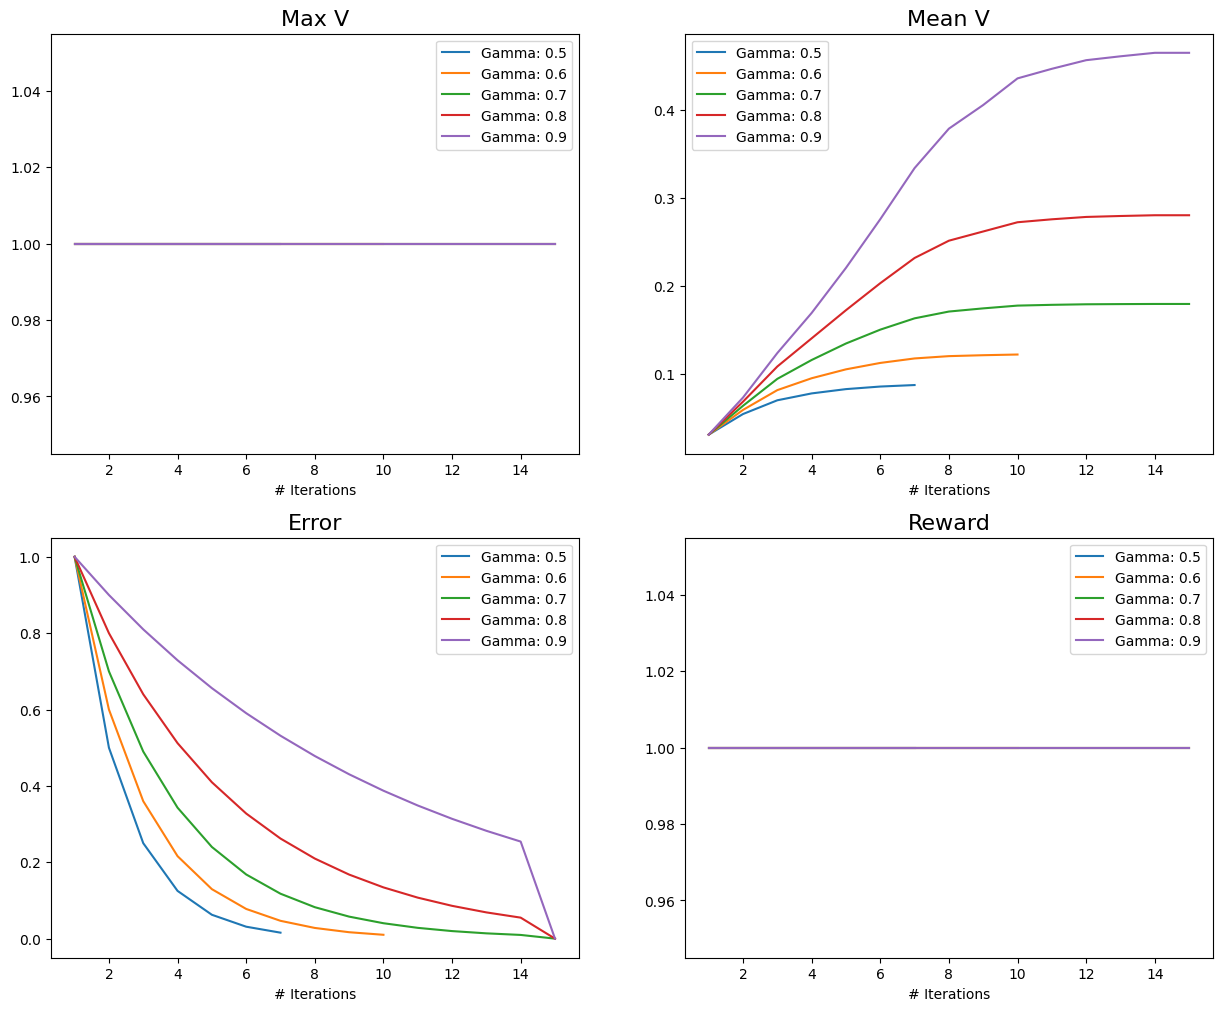

In [73]:
from time import time
tic = time()
env = gym.make("FrozenLake-v1", is_slippery=False, map_name=None, desc=None)
r, p = getRewardProb(env,8)
vi = mdp.ValueIteration(p, r, 0.99, max_iter=10000)
vi.run()
visualize_policy(vi.policy, (8,8), "8x8")
valueIterateGraph(p, r)
print(time()-tic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


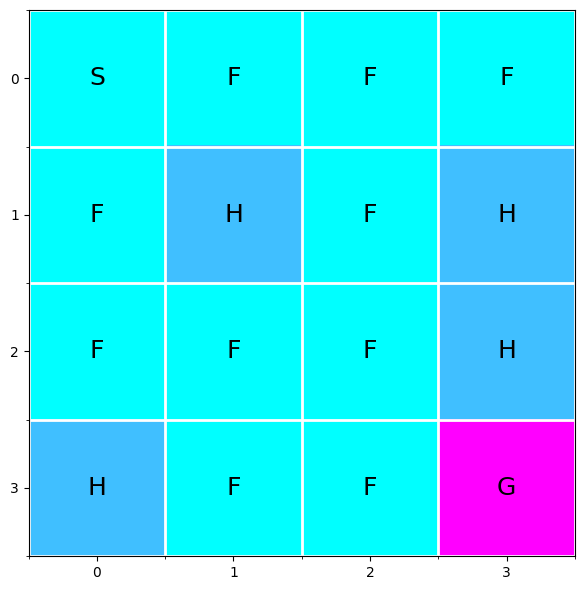

0.012128591537475586
0.0019605159759521484


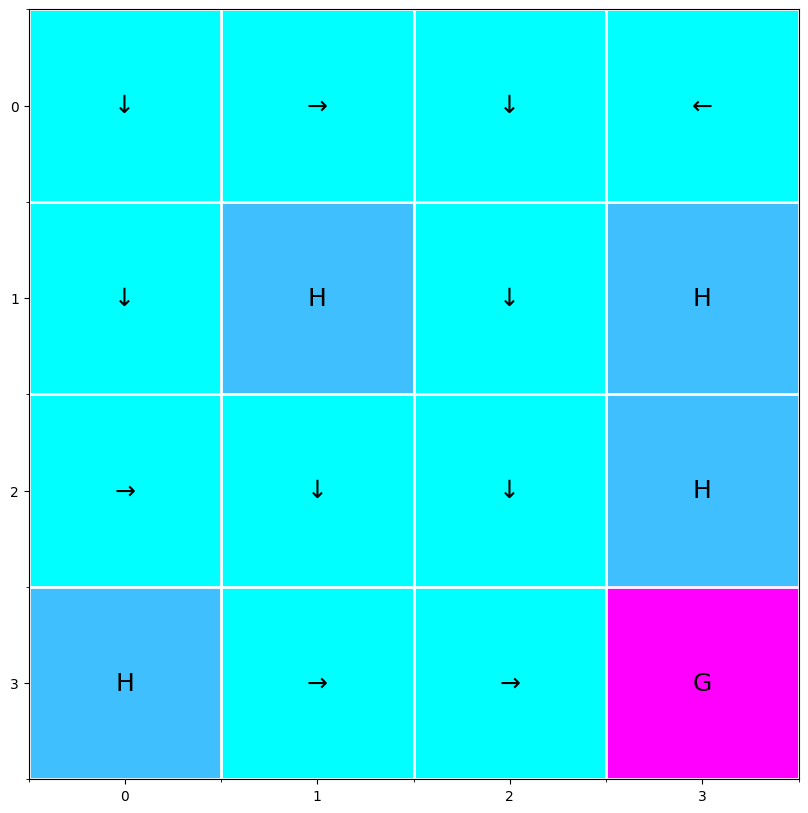

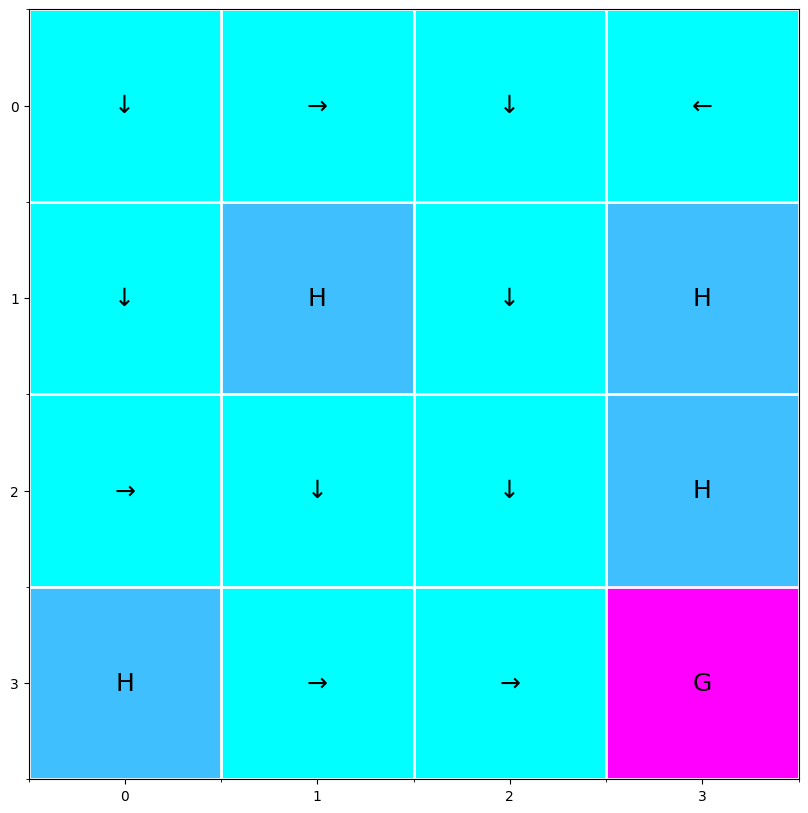

In [78]:
# policy iteration

s = 4
opt = "{}x{}".format(s,s)
sz = (s,s)
env = gym.make("FrozenLake-v1", is_slippery= False)
env.reset()
visualize_env(env, opt)
r, p = getRewardProb(env, 4)
import time

tic = time.time()
vi1 = mdp.PolicyIteration(p, r, 0.9, max_iter=100)
vi1.run()
print(time.time()-tic)

tic = time.time()
vi2 = mdp.ValueIteration(p, r, 0.9, max_iter=5000)
vi2.run()
print(time.time()-tic)

visualize_policy(vi1.policy, sz, opt)
visualize_policy(vi2.policy, sz, opt)

In [79]:
print("Policies match {}%".format(100*(np.array(vi1.policy) == np.array(vi2.policy)).sum()/np.array(vi1.policy).shape[0]))

Policies match 100.0%


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


[0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999]
0.11293339729309082


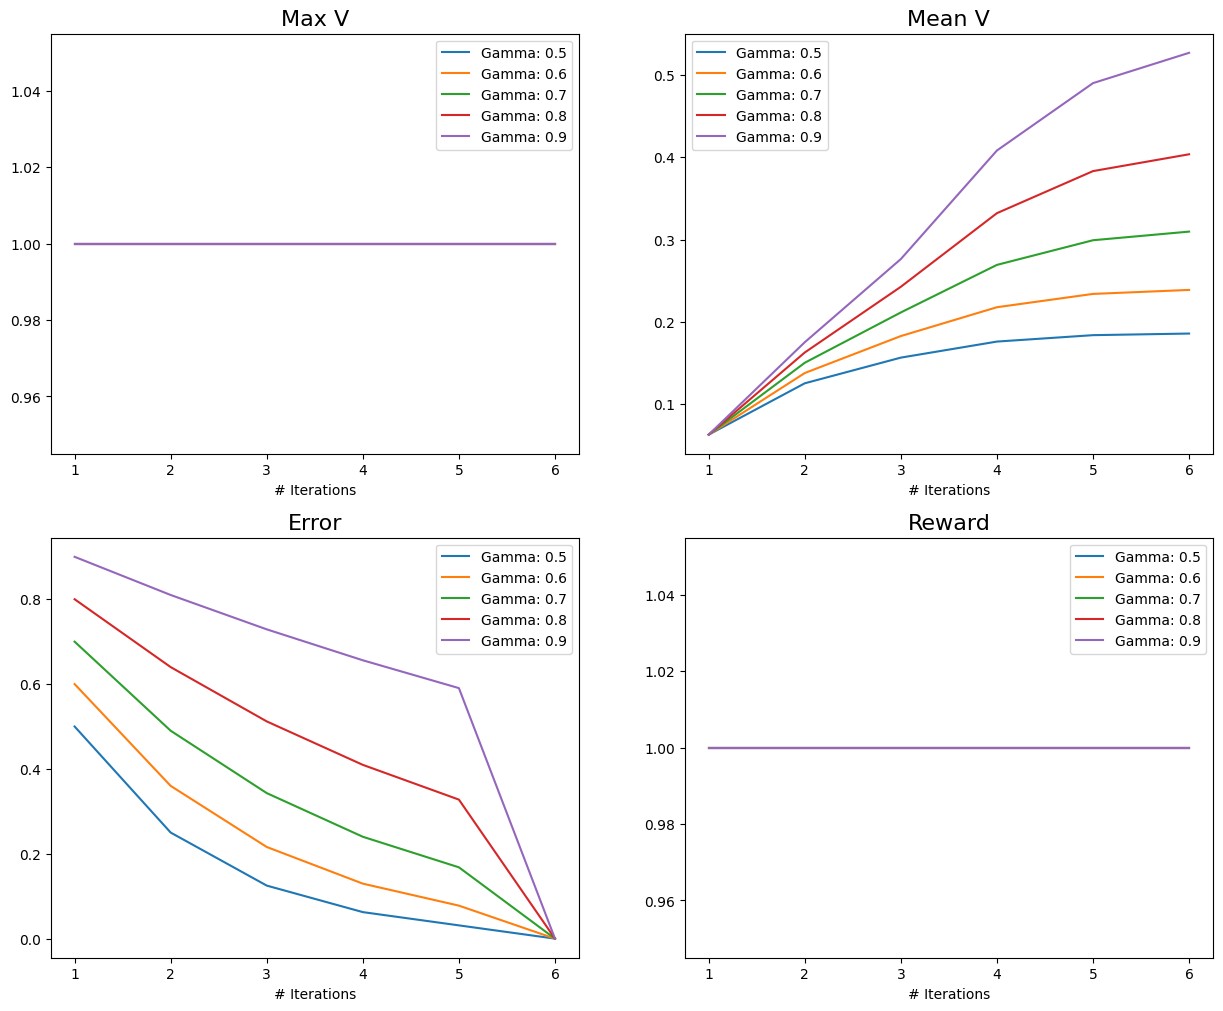

In [81]:
from time import time
tic = time()
env = gym.make("FrozenLake-v1", is_slippery=False)
r, p = getRewardProb(env,4)
valueIterateGraph(p, r, False)
print(time()-tic)

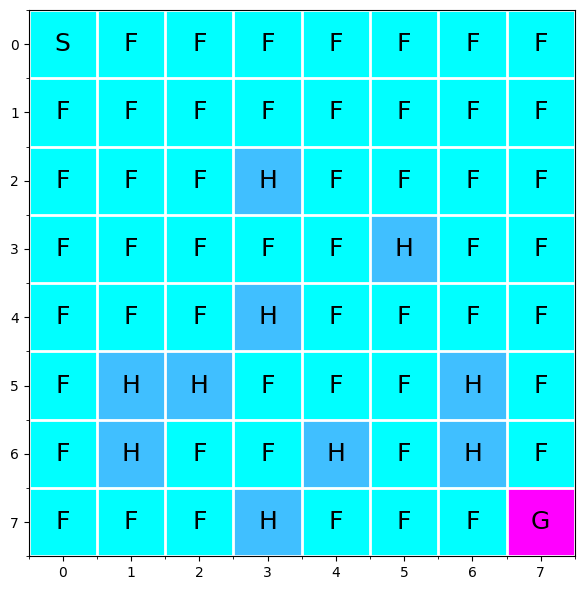

0.01480412483215332
0.004521608352661133


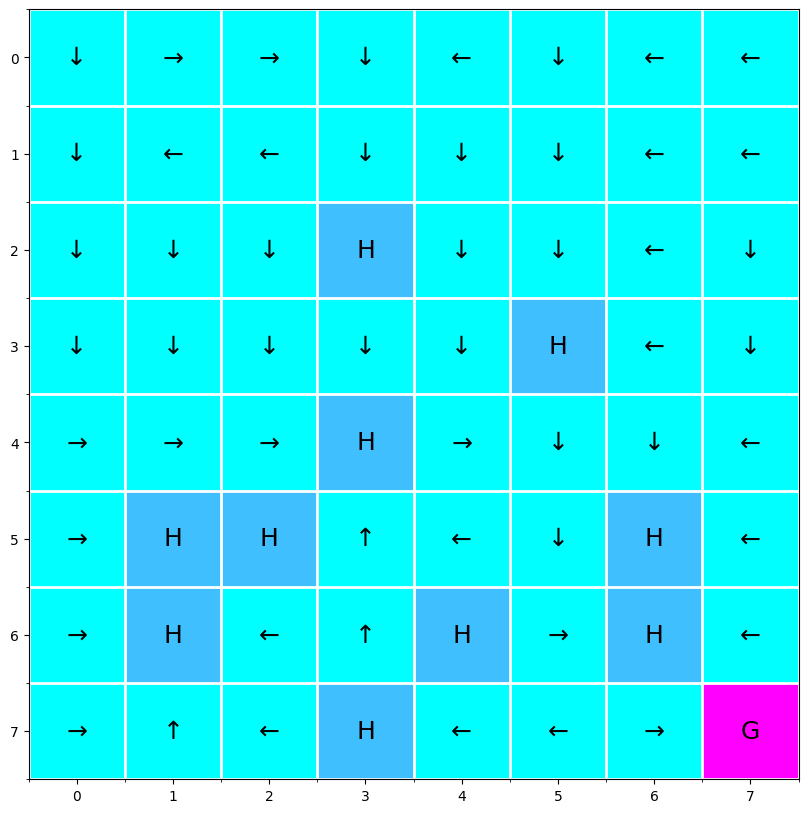

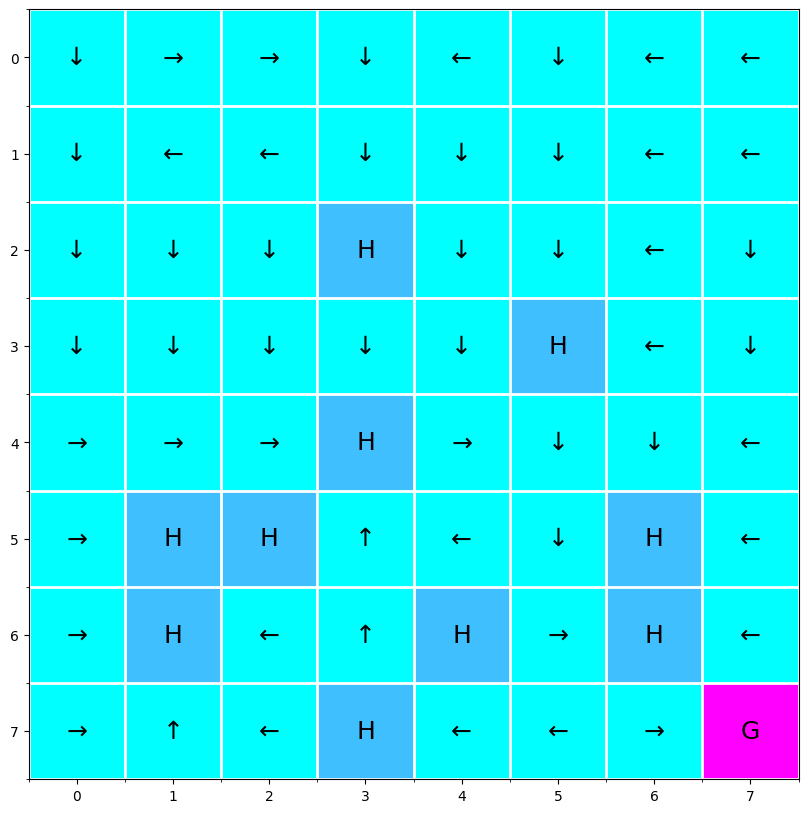

In [85]:
s = 8
opt = "{}x{}".format(s,s)
sz = (s,s)
env = gym.make("FrozenLake-v1", is_slippery= False, map_name=None, desc=None)
env.reset()
visualize_env(env, opt)
r, p = getRewardProb(env, 8)
import time

tic = time.time()
vi1 = mdp.PolicyIteration(p, r, 0.9, max_iter=100)
vi1.run()
print(time.time()-tic)

tic = time.time()
vi2 = mdp.ValueIteration(p, r, 0.9, max_iter=5000)
vi2.run()
print(time.time()-tic)

visualize_policy(vi1.policy, sz, opt)
visualize_policy(vi2.policy, sz, opt)

In [86]:
print("Policies match {}%".format(100*(np.array(vi1.policy) == np.array(vi2.policy)).sum()/np.array(vi1.policy).shape[0]))

Policies match 100.0%


[0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999]
0.5831897258758545


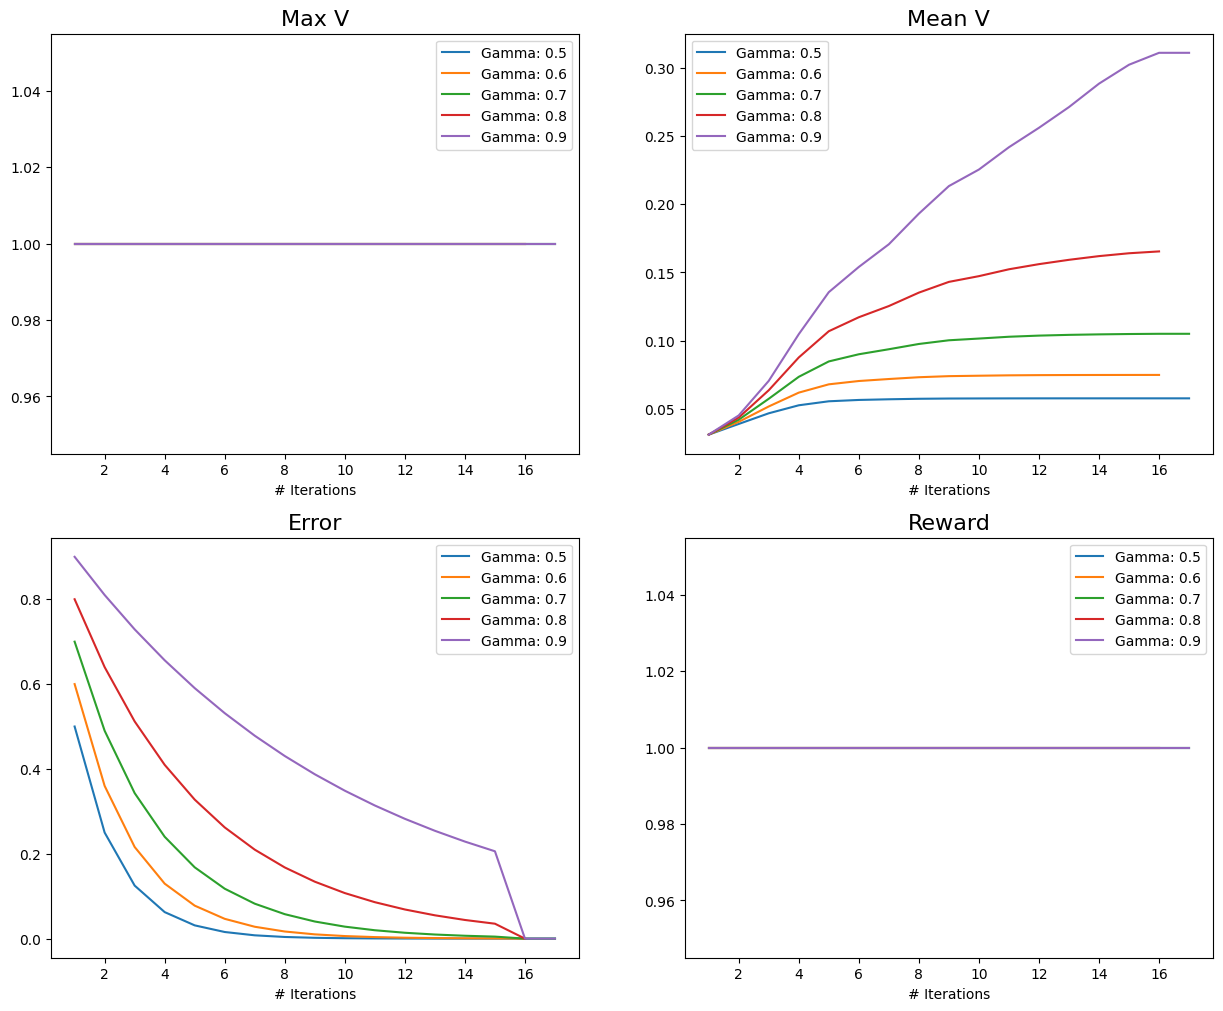

In [88]:
from time import time
tic = time()
env = gym.make("FrozenLake-v1", is_slippery=False, map_name=None, desc=None)
r, p = getRewardProb(env,8)
valueIterateGraph(p, r, False)
print(time()-tic)

In [ ]:
# Q learning
import numpy as np
import gym
from gym import wrappers
from datetime import datetime

# Q learning params
ALPHA = 0.01 # learning rate
GAMMA = 0.99 # reward discount
LEARNING_COUNT = 1000000
TEST_COUNT = 10000

TURN_LIMIT = 100
IS_MONITOR = False

class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        self.q_val = np.zeros(16 * 4).reshape(16, 4).astype(np.float32)

    def learn(self):
        # one episode learning
        state = self.env.reset()
        #self.env.render()

        for t in range(TURN_LIMIT):
            act = self.env.action_space.sample() # random
            next_state, reward, done, info = self.env.step(act)
            q_next_max = np.max(self.q_val[next_state])
            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            self.q_val[state][act] = (1 - ALPHA) * self.q_val[state][act]\
                                 + ALPHA * (reward + GAMMA * q_next_max)

            #self.env.render()
            if done:
                return reward
            else:
                state = next_state

    def test(self):
        state = self.env.reset()
        for t in range(TURN_LIMIT):
            act = np.argmax(self.q_val[state])
            next_state, reward, done, info = self.env.step(act)
            if done:
                return reward
            else:
                state = next_state
        return 0.0 # over limit

def main():
    env = gym.make("FrozenLake-v1")
    start = datetime.now()
    if IS_MONITOR:
        env = wrappers.Monitor(env, './FrozenLake-v1')
    agent = Agent(env)

    print("###### LEARNING #####")
    reward_total = 0.0
    for i in range(LEARNING_COUNT):
        reward_total += agent.learn()
    print("episodes      : {}".format(LEARNING_COUNT))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / LEARNING_COUNT))
    print("Q Value       :{}".format(agent.q_val))

    print("###### TEST #####")
    reward_total = 0.0
    for i in range(TEST_COUNT):
        reward_total += agent.test()
    print("episodes      : {}".format(TEST_COUNT))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / TEST_COUNT))
    end= datetime.now()
    print((end-start).total_seconds())

main()

